## Importamos las librerías 

In [3]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pymongo import MongoClient

### Cargamos el nuevo .csv

In [4]:
df = pd.read_csv("data/hp_quotes.csv",encoding = "ISO-8859-1", dtype=str
)

In [5]:
df.drop("Unnamed: 0", axis="columns", inplace=True)
df.head()

,character_name,dialogue
0,Albus Dumbledore,"I should have known that you would be here, Pr..."
1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru..."
2,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad."
3,Minerva McGonagall,And the boy?
4,Albus Dumbledore,Hagrid is bringing him.


## Sentiment analysis

In [6]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
sia = SentimentIntensityAnalyzer()

In [8]:
def sentimentAnalysis(dialog):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(dialog)
    pol = polarity['compound']
    return pol

In [9]:
df['sentiment_analysis'] = df.dialogue.apply(sentimentAnalysis)
df.head(10)

,character_name,dialogue,sentiment_analysis
0,Albus Dumbledore,"I should have known that you would be here, Pr...",0.0000
1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru...",0.6908
2,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad.",-0.0865
3,Minerva McGonagall,And the boy?,0.0000
4,Albus Dumbledore,Hagrid is bringing him.,0.0000
5,Minerva McGonagall,Do you think it wise to trust Hagrid with some...,0.8020
6,Albus Dumbledore,"Ah, Professor, I would trust Hagrid with my life.",0.5106
7,Rubeus Hagrid,"Professor Dumbledore, Sir. Professor McGonagall.",0.0000
8,Albus Dumbledore,"No problems, I trust, Hagrid?",-0.1531
9,Rubeus Hagrid,"No, Sir. Little tyke fell asleep just as we we...",-0.2960


In [13]:
Sentiment_todos = df.groupby(['character_name'])['sentiment_analysis'].mean().sort_values()
Sentiment_todos.head(15)

character_name
Man                  -0.658000
Voldemort            -0.234213
Firenze              -0.151320
George Weasley       -0.131050
Neville Longbottom   -0.065636
Seamus Finnigan      -0.051280
Argus Filch          -0.039550
Dudley Dursley       -0.038871
Vernon Dursley       -0.030370
Harry Potter         -0.003519
The Fat Lady          0.000000
Marcus Flint          0.000000
Doris Crockford       0.000000
Bloody Baron          0.000000
Oliver Wood           0.014775
Name: sentiment_analysis, dtype: float64

<AxesSubplot:xlabel='character_name'>

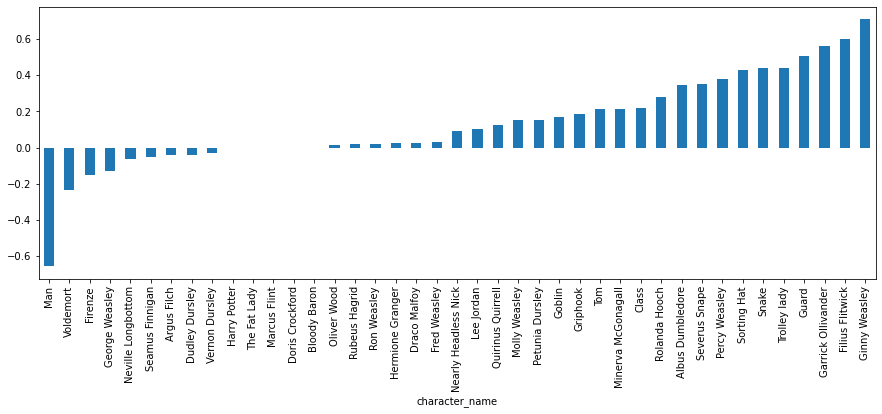

In [18]:
Sentiment_todos.plot(kind="bar", figsize = (15,5))